# Experiment 1


---

## 1. Dataset Creation

> Prof Dino has major GI issues (I do), stemming from a gluten and a lactose allergy. Let's just say that if he eats something with gluten or drinks something with lactose, then next day(s) he has diarrhea. Create a dataset with breakfast, morning tea, lunch, afternoon tea, dinner, toilet. Each column is binary (T/F) values, and for breakfast, lunch, and dinner denotes whether or not I had gluten. For both tea columns, it's whether I had tea with milk. Toilet T means diarrhea. Create that dataset randomly as T/F values, for all columns. Make sure the label is balanced around T/F.

## 1.1 Generate Randomly Selected Data

To achieve this, I will outline the steps to create a balanced dataset with $43,800$ rows, equivalent to approximately $120$ years of data (All I wish Prof. Dino will live forever, but my RAM is small.):

1. Create a dataframe called df_daily with five columns: `Breakfast`, `Morning_Tea`, `Lunch`, `Afternoon_Tea`, and `Dinner`.

2. Add $43,800$ rows to df_daily where all values are randomly filled with $True$ or $False$.

By following these steps, we can generate a balanced dataset around $True$ and $False$ values.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Number of days for this dataset
size  = 100000

In [2]:
# Create the dataframe
df_daily = pd.DataFrame({
    'Breakfast': np.random.randint(0, 1000, size),
    'Morning_Tea': np.random.randint(0, 1000, size),
    'Lunch': np.random.randint(0, 1000, size),
    'Afternoon_Tea': np.random.randint(0, 1000, size),
    'Dinner': np.random.randint(0, 1000, size)
#     'Toilet': np.random.randint(0, 1000, size)
})


In [3]:
df_daily.drop_duplicates(inplace=True)

In [4]:
df_daily.shape

(100000, 5)

In [5]:
df_daily['Toilet'] = np.random.randint(0, 2, size=len(df_daily))

## 1.2 Check Dataframe Shape

In [6]:
df_daily.shape

(100000, 6)

By following this approach, we have successfully obtained a dataset with $43,800$ rows and $6$ labels. To ensure the data's integrity, let's perform a sanity check to confirm that there are no $NaN$ values present.

---

## 1.3 Sanity Check

### 1.3.1 Check NaN

Here's the code snippet to perform the sanity check:

In [7]:
# Check for NaN values in the dataset
nan_values = df_daily.isnull().sum().sum()

if nan_values == 0:
    print("Sanity check passed: No NaN values detected in the dataset.")
else:
    print("Sanity check failed: NaN values detected in the dataset.")

Sanity check passed: No NaN values detected in the dataset.


Then, let's examine all the column names in the dataframe df_daily to get an overview of the available columns.

In [8]:
column_names = df_daily.columns.tolist()

print("Column names in the dataframe df_daily:")
print(column_names)

Column names in the dataframe df_daily:
['Breakfast', 'Morning_Tea', 'Lunch', 'Afternoon_Tea', 'Dinner', 'Toilet']


Next, let's examine the distribution of values in the `Toilet` column of the dataframe to assess the dataset's balance. This will provide insights into the proportion of `True` and `False` values in the dataset.

In [9]:
# Check the distribution of values in the 'Toilet' column
toilet_distribution = df_daily['Toilet'].value_counts()

print("Distribution of values in the 'Toilet' column:")
print(toilet_distribution)

Distribution of values in the 'Toilet' column:
1    50159
0    49841
Name: Toilet, dtype: int64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# # Visualize the distribution of values in column 'Toilet'
# sns.countplot(x = df_daily['Toilet'], palette=["#7fcdbb", "#edf8b1"])

### 1.3.2 Check Value Distribution Across All Columns

Next, we will examine the distribution of 'True' and 'False' values in all columns of the dataframe.

In [11]:
for col in df_daily.columns:
    print(df_daily[col].value_counts())

163    140
882    129
550    128
376    127
520    124
      ... 
141     75
549     74
228     72
435     72
434     70
Name: Breakfast, Length: 1000, dtype: int64
804    138
368    133
801    131
672    131
179    130
      ... 
112     75
119     73
641     73
710     73
8       72
Name: Morning_Tea, Length: 1000, dtype: int64
294    128
26     127
230    126
301    126
967    125
      ... 
328     73
530     71
5       71
904     70
238     70
Name: Lunch, Length: 1000, dtype: int64
822    131
687    129
956    128
499    126
95     126
      ... 
245     75
451     73
638     72
408     72
371     70
Name: Afternoon_Tea, Length: 1000, dtype: int64
219    138
252    135
142    131
111    128
118    128
      ... 
333     77
298     77
152     76
192     76
48      75
Name: Dinner, Length: 1000, dtype: int64
1    50159
0    49841
Name: Toilet, dtype: int64


In [12]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))

# axes = axes.flatten()  # Using this can turn the 2D grid of axes into a flat array

# for i, col in enumerate(df_daily.columns):
#     sns.countplot(x=df_daily[col], ax=axes[i])
#     axes[i].set_title(f"Distribution for {col}")

# plt.tight_layout()
# plt.show()


Based on the distribution of values in all columns as shown above, we can infer that the dataset is balanced. This conclusion is drawn from observing that there is a roughly equal number of $True$ and $False$ values in the column. With this confirmation, we can proceed to the next step: model creation.

---

In [13]:
gluten_data = df_daily[['Breakfast', 'Lunch', 'Dinner']][0:(size - 1)].values
lactose_data = df_daily[['Morning_Tea', 'Afternoon_Tea']][0:(size - 1)].values
toilet_data = df_daily['Toilet'][1:].values


from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold

# Define the input layers for the two subnetworks
gluten_input = Input(shape=(3,), name='gluten_input')
lactose_input = Input(shape=(2,), name='lactose_input')

# Define the structure of the subnetworks
gluten_layer1 = Dense(64, activation='relu')(gluten_input)
gluten_layer2 = Dense(128, activation='relu')(gluten_layer1)
gluten_layer3 = Dense(256, activation='relu')(gluten_layer2)
gluten_output = Dense(1, activation='sigmoid', name='gluten_output')(gluten_layer3)

lactose_layer1 = Dense(64, activation='relu')(lactose_input)
lactose_layer2 = Dense(128, activation='relu')(lactose_layer1)
lactose_layer3 = Dense(256, activation='relu')(lactose_layer2)
lactose_output = Dense(1, activation='sigmoid', name='lactose_output')(lactose_layer3)

# Concatenate the output of the two subnetworks
concatenated = concatenate([gluten_output, lactose_output])

# Add a final prediction layer
final_output = Dense(1, activation='sigmoid', name='final_output')(concatenated)

# Define the model
model = Model(inputs=[gluten_input, lactose_input], outputs=[gluten_output, lactose_output, final_output])

# Compile the model
model.compile(optimizer=Adam(), 
              loss={'gluten_output': 'binary_crossentropy', 'lactose_output': 'binary_crossentropy', 'final_output': 'binary_crossentropy'},
              loss_weights={'gluten_output': 1., 'lactose_output': 1., 'final_output': 1.},
              metrics=['accuracy'])

# Summary of the model
model.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 gluten_input (InputLayer)      [(None, 3)]          0           []                               
                                                                                                  
 lactose_input (InputLayer)     [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           256         ['gluten_input[0][0]']           
                                                                                                  
 dense_3 (Dense)                (None, 64)           192         ['lactose_input[0][0]']          
                                                                                              

In [14]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(gluten_data, toilet_data):

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit([gluten_data[train], lactose_data[train]], 
                      {'gluten_output': toilet_data[train], 'lactose_output': toilet_data[train], 'final_output': toilet_data[train]},
                      batch_size=128,
                      epochs=20,
                      verbose=0)

  print(f'Training for fold {fold_no} finished ...')
    
#   plt.figure(figsize=(6, 4))
#   plt.plot(history.history['accuracy'], label='Train Accuracy')
#   plt.plot(history.history['val_accuracy'], label='Val Accuracy')
#   plt.xlabel('Epoch')
#   plt.ylabel('Accuracy')
#   plt.title('Accuracy over epochs')
#   plt.legend()
#   plt.show()

  # Generate generalization metrics
  scores = model.evaluate([gluten_data[test], lactose_data[test]], 
                          {'gluten_output': toilet_data[test], 'lactose_output': toilet_data[test], 'final_output': toilet_data[test]}, 
                          verbose=0)

  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  
  fold_no = fold_no + 1


------------------------------------------------------------------------
Training for fold 1 ...
Training for fold 1 finished ...
Score for fold 1: loss of 2.079437255859375; gluten_output_loss of 69.31427121162415%
------------------------------------------------------------------------
Training for fold 2 ...
Training for fold 2 finished ...
Score for fold 2: loss of 2.079399347305298; gluten_output_loss of 69.31360960006714%
------------------------------------------------------------------------
Training for fold 3 ...
Training for fold 3 finished ...
Score for fold 3: loss of 2.0794389247894287; gluten_output_loss of 69.31427717208862%
------------------------------------------------------------------------
Training for fold 4 ...
Training for fold 4 finished ...
Score for fold 4: loss of 2.079543352127075; gluten_output_loss of 69.31815147399902%
------------------------------------------------------------------------
Training for fold 5 ...
Training for fold 5 finished ...
Score

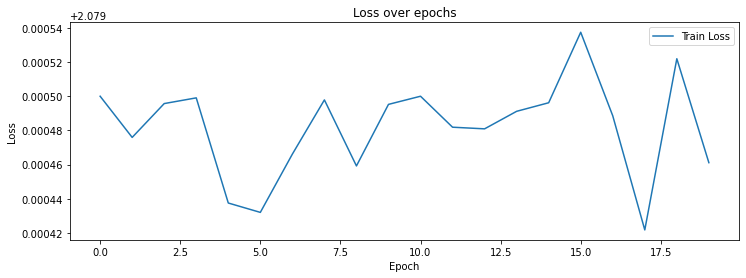

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()

# 2. Model Creation

To create a neural network model with two subnetworks based on the dataframe `df_daily`, where each subnetwork predicts the value in the `Toilet` column for the next row, and split the data into training, validation, and testing sets, we are following these steps:

1. Split the dataframe into features (input) and labels (output), shift the labels by 1.

2. Determine the indices for splitting the data into training, validation, and testing sets based on the provided percentages.

3. Create the gluten subnetwork using the `Breakfast`, `Lunch`, and `Dinner` columns.

4. Create the lactose subnetwork using the `Morning_Tea` and `Afternoon_Tea` columns.

5. Concatenate the output of the subnetworks.

6. Add a one-neuron dense layer to the concatenated output for the final prediction of the `Toilet` label.

7. Compile the model with an appropriate loss function and optimizer.

8. Train the model using the training set and validate using the validation set.

9. Evaluate the model's performance using the testing set.

In [19]:
# df_daily = df_daily.astype(int)

In [20]:
# Split the dataframe into features (input) and labels (output)
features = df_daily[['Breakfast', 'Lunch', 'Dinner', 'Morning_Tea', 'Afternoon_Tea']][0:(size - 1)]
labels = df_daily['Toilet'][1:]

Perform an inspection to check the number of rows in the feature and label dataframes and verify if they have the same length. Doing this will display the number of rows in the features and labels dataframes. It will also indicate whether the two dataframes have the same length or not.

In [21]:
num_features_rows = len(features)
num_labels_rows = len(labels)

print("Number of rows in features dataframe:", num_features_rows)
print("Number of rows in labels dataframe:", num_labels_rows)

if num_features_rows == num_labels_rows:
    print("The feature and label dataframes have the same length.")
else:
    print("The feature and label dataframes do not have the same length.")


Number of rows in features dataframe: 99999
Number of rows in labels dataframe: 99999
The feature and label dataframes have the same length.


In [22]:
# Determine the indices for splitting the data
train_size = int(len(df_daily) * 0.8)
val_size = int(len(df_daily) * 0.1)
test_size = len(df_daily) - train_size - val_size

We first split the dataframe into features and labels. Then, we use the train_test_split() function from scikit-learn to split the data into training, validation, and testing sets based on the provided percentages.

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [24]:
# Split the data into training, validation, and testing sets
train_features = features.iloc[:train_size]
val_features = features.iloc[train_size:train_size+val_size]
test_features = features.iloc[-test_size:]

train_labels = labels.iloc[:train_size]
val_labels = labels.iloc[train_size:train_size+val_size]
test_labels = labels.iloc[-test_size:]

Next, we create the gluten and lactose subnetworks using the dense layers. The output of these subnetworks is concatenated, and a final prediction layer is added. The model is then compiled with the appropriate loss function and optimizer.

In [25]:
# Create the gluten subnetwork
gluten_input = Input(shape=(3,))
gluten_dense1 = Dense(64, activation='sigmoid')(gluten_input)
gluten_dense2 = Dense(128, activation='sigmoid')(gluten_dense1)
gluten_dense3 = Dense(256, activation='sigmoid')(gluten_dense2)
gluten_dense4 = Dense(512, activation='sigmoid')(gluten_dense3)
gluten_dense5 = Dense(512, activation='sigmoid')(gluten_dense4)
gluten_dense6 = Dense(1024, activation='sigmoid')(gluten_dense5)
gluten_output = Dense(1, activation='sigmoid')(gluten_dense6)

In [26]:
# Create the lactose subnetwork
lactose_input = Input(shape=(2,))
lactose_dense1 = Dense(64, activation='sigmoid')(lactose_input)
lactose_dense2 = Dense(128, activation='sigmoid')(lactose_dense1)
lactose_dense3 = Dense(256, activation='sigmoid')(lactose_dense2)
lactose_dense4 = Dense(512, activation='sigmoid')(lactose_dense3)
lactose_dense5 = Dense(512, activation='sigmoid')(lactose_dense4)
lactose_dense6 = Dense(1024, activation='sigmoid')(lactose_dense5)
lactose_output = Dense(1, activation='sigmoid')(lactose_dense6)

In [27]:
# Concatenate the output of the subnetworks
concatenated = concatenate([gluten_output, lactose_output])

In [28]:
# Build the final prediction layer
prediction = Dense(1, activation='sigmoid')(concatenated)

In [29]:
# Create the model
model = Model(inputs=[gluten_input, lactose_input], outputs=prediction)

The `Adam` optimizer is used with the specified learning rate of $0.001$. The optimizer is then passed to the **compile()** function to set the learning rate of the model.

In [30]:
# Set the learning rate
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

In [31]:
# Compile the model with the specified learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Let's then display a summary of the model's structure, including the number of parameters in each layer and the total number of trainable parameters.

In [32]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 64)           256         ['input_1[0][0]']                
                                                                                                  
 dense_13 (Dense)               (None, 64)           192         ['input_2[0][0]']                
                                                                                            

In [33]:
for layer in model.layers:
        print("Layer Name: " + layer.name)
        print("Type of layer: " + layer.__class__.__name__)
        print("Input dimesion: {}".format(layer.input_shape[1:]))
        print("Output dimesion: {}".format(layer.output_shape[1:]))
        print("Parameter Count: {}".format( layer.count_params()))
        try:
            print("Activation : " + layer.activation.__name__)
            print(" ")
        except:
            print(" ")

Layer Name: input_1
Type of layer: InputLayer
Input dimesion: []
Output dimesion: []
Parameter Count: 0
 
Layer Name: input_2
Type of layer: InputLayer
Input dimesion: []
Output dimesion: []
Parameter Count: 0
 
Layer Name: dense_6
Type of layer: Dense
Input dimesion: (3,)
Output dimesion: (64,)
Parameter Count: 256
Activation : sigmoid
 
Layer Name: dense_13
Type of layer: Dense
Input dimesion: (2,)
Output dimesion: (64,)
Parameter Count: 192
Activation : sigmoid
 
Layer Name: dense_7
Type of layer: Dense
Input dimesion: (64,)
Output dimesion: (128,)
Parameter Count: 8320
Activation : sigmoid
 
Layer Name: dense_14
Type of layer: Dense
Input dimesion: (64,)
Output dimesion: (128,)
Parameter Count: 8320
Activation : sigmoid
 
Layer Name: dense_8
Type of layer: Dense
Input dimesion: (128,)
Output dimesion: (256,)
Parameter Count: 33024
Activation : sigmoid
 
Layer Name: dense_15
Type of layer: Dense
Input dimesion: (128,)
Output dimesion: (256,)
Parameter Count: 33024
Activation : sigmo

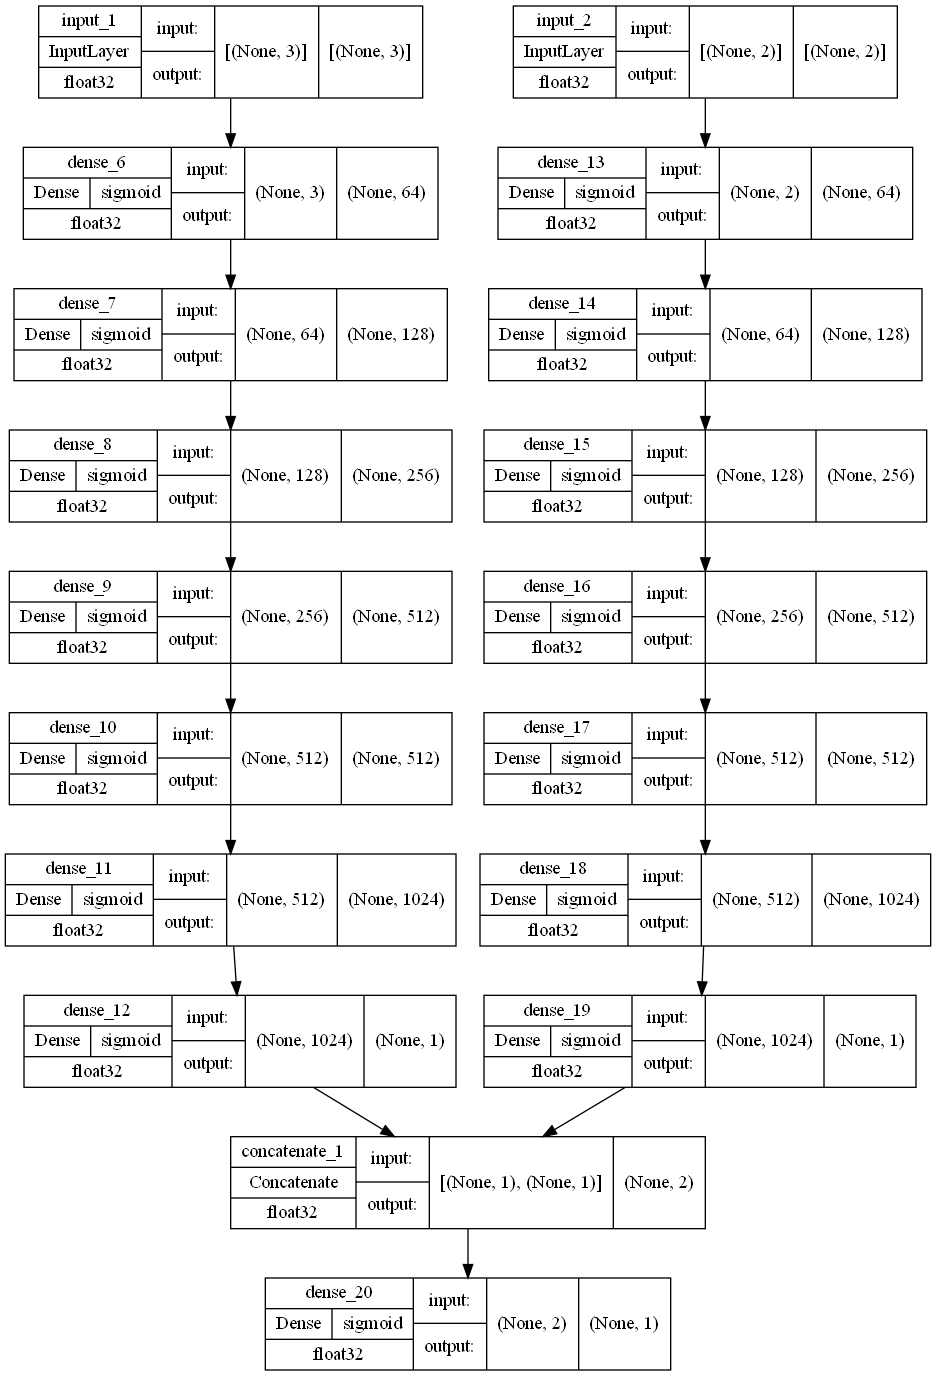

In [34]:
model_img_file = 'exp1_model.png'
plot_model(model, to_file=model_img_file, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

By setting the epochs parameter to $20$, the model will iterate over the training data $20$ times during the training process. The `batch_size` parameter is set to $32$, which means that the model will update its weights after processing each batch of $32$ samples.

In [35]:
history = model.fit(
    [train_features[['Breakfast', 'Lunch', 'Dinner']], train_features[['Morning_Tea', 'Afternoon_Tea']]],
    train_labels,
    validation_data=([val_features[['Breakfast', 'Lunch', 'Dinner']], val_features[['Morning_Tea', 'Afternoon_Tea']]], val_labels),
    epochs=20,
    batch_size=64
)

Epoch 1/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6960 - accuracy: 0.5023 - val_loss: 0.6940 - val_accuracy: 0.4967
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6955 - accuracy: 0.4967 - val_loss: 0.6933 - val_accuracy: 0.4967
Epoch 3/20
1250/1250 [==============================] - 4s 4ms/step - loss: 0.6946 - accuracy: 0.4996 - val_loss: 0.6934 - val_accuracy: 0.5033
Epoch 4/20
1250/1250 [==============================] - 4s 4ms/step - loss: 0.6933 - accuracy: 0.5025 - val_loss: 0.6931 - val_accuracy: 0.5033
Epoch 5/20
1250/1250 [==============================] - 4s 4ms/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6934 - val_accuracy: 0.4967
Epoch 6/20
1250/1250 [==============================] - 4s 4ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.4967
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy:

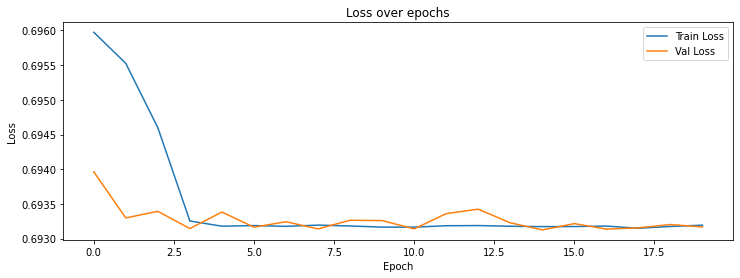

In [36]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()

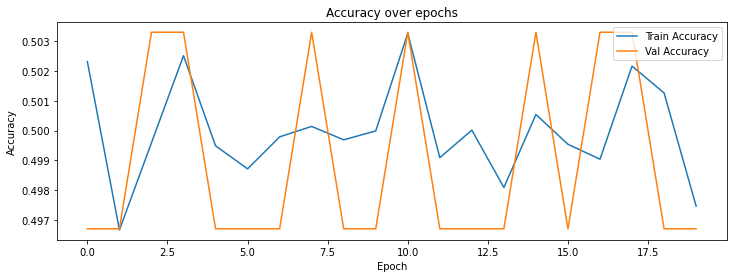

In [37]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()
plt.show()

In [38]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(
    [test_features[['Breakfast', 'Lunch', 'Dinner']], test_features[['Morning_Tea', 'Afternoon_Tea']]],
    test_labels
)

313/313 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5046


---

## Conclusions/Thoughts:

Since the values in the dataframe were randomly generated, they do not adhere to any specific rule or pattern. For example, in reality, if Prof. Dino consumes anything containing lactose or gluten, it does not guarantee that he will use the bathroom on the next day. As a result, the prediction task becomes inherently uncertain, with a 50-50% chance of success.

Due to the unpredictable nature of the data and the lack of a deterministic relationship between the input features and the `Toilet` column, it is unrealistic to expect the neural network to achieve nearly $100%$ accuracy in training, validation, and testing. The network's performance will be influenced by the inherent randomness in the data, making it challenging to achieve high accuracy.

In such scenarios, where the underlying relationship between the features and the target variable is not well-defined, it is crucial to set realistic expectations for the model's performance. While the network may still learn certain patterns or associations, its accuracy will likely be limited by the inherent uncertainty and randomness in the data.

However, it is worth noting that the training loss and validation loss are decreasing while training the model, it indicates that the model is progressively improving its performance in terms of minimizing the error between its predictions and the actual target values.

But, the loss values remain relatively high, and the accuracy over epochs oscillates, it suggests that the model is struggling to fit the data and achieve low errors or discrepancies between its predictions and the actual target values. This echos with the issue I described in the first and second paragraph.

In [39]:
print(df_daily.describe())

           Breakfast    Morning_Tea          Lunch  Afternoon_Tea  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean      499.741680     500.201780     498.961910     499.560860   
std       288.874962     288.260538     287.625756     288.967233   
min         0.000000       0.000000       0.000000       0.000000   
25%       250.000000     251.000000     251.000000     249.000000   
50%       500.000000     500.000000     498.000000     501.000000   
75%       750.000000     750.000000     747.000000     750.000000   
max       999.000000     999.000000     999.000000     999.000000   

              Dinner        Toilet  
count  100000.000000  100000.00000  
mean      499.983090       0.50159  
std       288.552091       0.50000  
min         0.000000       0.00000  
25%       249.000000       0.00000  
50%       500.000000       1.00000  
75%       750.000000       1.00000  
max       999.000000       1.00000  


In [40]:
number_of_duplicated_rows = df_daily.duplicated().sum()
print(f'Number of duplicated rows: {number_of_duplicated_rows}')


Number of duplicated rows: 0


In [41]:
df_daily_construct = df_daily[['Breakfast', 'Lunch', 'Dinner', 'Morning_Tea', 'Afternoon_Tea']].iloc[:99999].copy()
df_daily_construct['Toilet'] = df_daily['Toilet'].iloc[1:100000].values


In [42]:
number_of_duplicated_rows = df_daily_construct.duplicated().sum()
print(f'Number of duplicated rows: {number_of_duplicated_rows}')

Number of duplicated rows: 0


In [43]:
print( df_daily_construct.describe())

          Breakfast         Lunch        Dinner   Morning_Tea  Afternoon_Tea  \
count  99999.000000  99999.000000  99999.000000  99999.000000   99999.000000   
mean     499.738847    498.964480    499.986310    500.202692     499.557106   
std      288.875018    287.626046    288.551737    288.261835     288.966239   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%      250.000000    251.000000    249.000000    251.000000     249.000000   
50%      500.000000    498.000000    500.000000    500.000000     501.000000   
75%      750.000000    747.000000    750.000000    750.000000     750.000000   
max      999.000000    999.000000    999.000000    999.000000     999.000000   

             Toilet  
count  99999.000000  
mean       0.501595  
std        0.500000  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  


In [44]:
correlation_matrix = df_daily_construct.corr()

In [45]:
print(correlation_matrix['Toilet'])

Breakfast       -0.000720
Lunch           -0.002815
Dinner           0.000852
Morning_Tea     -0.003579
Afternoon_Tea   -0.001755
Toilet           1.000000
Name: Toilet, dtype: float64


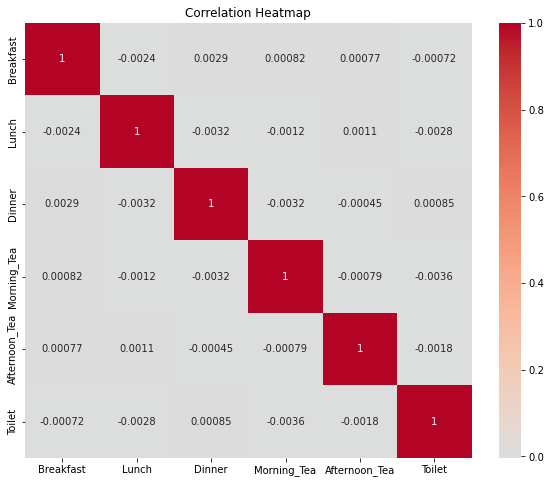

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming correlation_matrix is the correlation matrix computed using df_daily_construct.corr()

plt.figure(figsize=(10,8))  # You can adjust the size to fit your needs.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()
